## 초기 자본금 액수 DOE
- 초기 자본금 또는 투자금 액수를 조정해서, 모델 학습 및 수익율 결과에 영향을 미치는 지 알아보자

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Action 비율

In [3]:
# 초기자본금 100만=> 1000만으로 올려 학습시킨 Action 결과
kakao_df = pd.read_csv('./Results/3. init_cash increasing_A035720_20201108/train_re_20201108/action_20201108.csv')

In [11]:
data = kakao_df.iloc[0].value_counts()

['Holding', 'Sell', 'Buy']
[659 245 103]


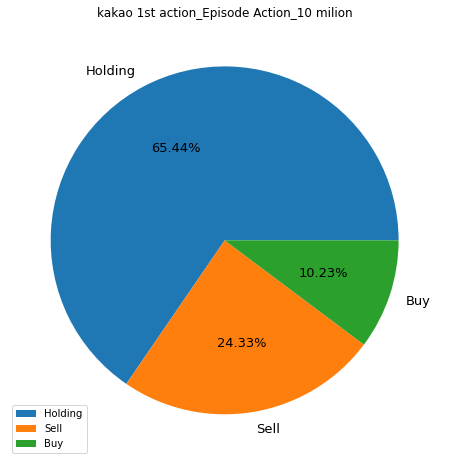

In [17]:
label = []
for i in data.index:
    if i == 0:
        label.append('Holding')
    if i ==1:
        label.append('Buy')
    if i == 2:
        label.append('Sell')
print(label)
print(data.values)
plt.figure(figsize=(11, 8))
plt.pie(data, labels=label,autopct='%.2f%%',textprops = {'fontsize':13})
plt.title('kakao 1st action_Episode Action_10 milion')
plt.legend()
plt.savefig('kakao_action_train_1st_with_cash(10 million).png', dpi=300)
plt.show()

In [13]:
data2 = kakao_df.iloc[-1].value_counts()

['Holding', 'Sell', 'Buy']
[629 252 126]


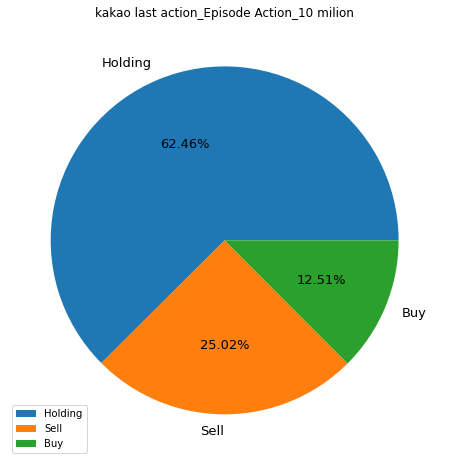

In [18]:
label = []
for i in data2.index:
    if i == 0:
        label.append('Holding')
    if i ==1:
        label.append('Buy')
    if i == 2:
        label.append('Sell')
print(label)
print(data2.values)
plt.figure(figsize=(11, 8))
plt.pie(data2, labels=label,autopct='%.2f%%',textprops = {'fontsize':13})
plt.title('kakao last action_Episode Action_10 milion')
plt.legend()
plt.savefig('kakao_action_train_last_with_cash(10 million).png', dpi=300)
plt.show()

In [19]:
test_df = pd.read_csv('./Results/3. init_cash increasing_A035720_20201108/test_re_20201108/action.csv')

In [23]:
data3= test_df['0'].value_counts()

['Holding', 'Sell', 'Buy']
[234  10   8]


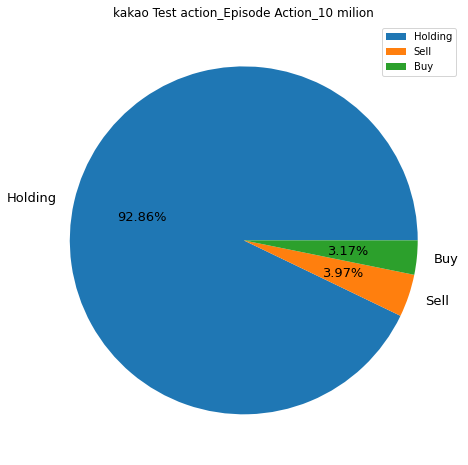

In [24]:
label = []
for i in data3.index:
    if i == 0:
        label.append('Holding')
    if i ==1:
        label.append('Buy')
    if i == 2:
        label.append('Sell')
print(label)
print(data3.values)
plt.figure(figsize=(11, 8))
plt.pie(data3, labels=label,autopct='%.2f%%',textprops = {'fontsize':13})
plt.title('kakao Test action_Episode Action_10 milion')
plt.legend()
plt.savefig('kakao_action_test_with_cash(10 million).png', dpi=300)
plt.show()

- 초기 자본금이 10배로 증가하여도, 관망 비율이 높은 것은 그대로이나, 상대적으로 Buy Sell 비율도 조금은 높아졌다

### 수익율
### 2.1 train data

In [25]:
# 100번 학습동안의 각 최종 수익율 불러오기
reward_df = pd.read_csv('./Results/3. init_cash increasing_A035720_20201108//Train_re_20201108/reward_20201108.csv')

In [30]:
reward_ref_df = pd.read_csv('./Results/1. ref_ A035720_20201108/Train_re_20201108/reward_20201108.csv')

In [26]:
reward_df.tail()

,0
95,77.73935
96,64.69305
97,92.82161
98,69.26407
99,78.14485


In [27]:
reward_df.sort_values(by='0')

,0
4,-16.09508
14,-14.98386
9,-14.90981
15,-13.58447
12,-12.57392
...,...
23,118.44180
79,119.36091
7,122.12433
78,124.37654


In [31]:
reward_ref_df.sort_values(by='0')

,0
67,0.9968
60,5.9231
81,29.2947
96,36.5338
95,38.3579
...,...
74,136.1889
22,137.5559
14,145.7672
31,153.6616


### 학습 epoch 횟수에 따른 최종 수익율 변화

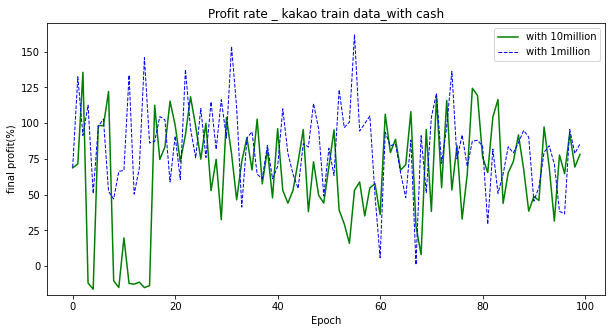

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(reward_df, 'g',  label='with 10million')
plt.plot(reward_ref_df, 'b--', linewidth=1, label='with 1million')
plt.title('Profit rate _ kakao train data_with cash')
plt.legend()
plt.ylabel('final profit(%)')
plt.xlabel('Epoch')
plt.ylim(-20, 170)
plt.savefig('kakao_profit_train_with_cash_compared.png', dpi=300)
plt.show()

- 초기 학습시 마이너스 구간을 보이나, 학습이 반복될수록 역시 수익율 구간은 올라간다.
- 반복될수록 결국 비슷해졌다.

### Test 데이터 수익율

In [39]:
reward_test_df = pd.read_csv('./Results/3. init_cash increasing_A035720_20201108/Test_re_20201108/reward.csv')
reward_test_ref_df = pd.read_csv('./Results/1. ref_ A035720_20201108/Test_re_20201108/reward.csv')

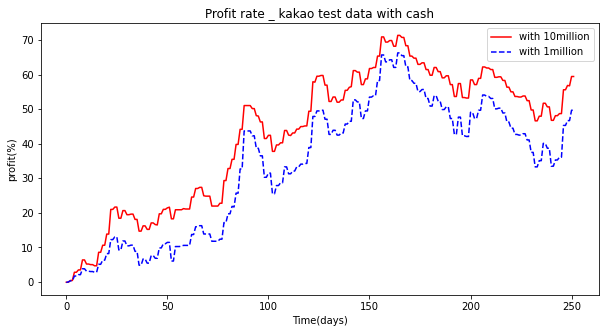

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(reward_test_df, 'r',  label='with 10million')
plt.plot(reward_test_ref_df, 'b--',  label='with 1million')
plt.title('Profit rate _ kakao test data with cash')
plt.legend()
plt.ylabel('profit(%)')
plt.xlabel('Time(days)')
plt.savefig('kakao_profit_test_with_cash_compared.png', dpi=300)
plt.show()

- 추세는 비슷하게 따라간다. 금액과 상관없이 학습 모델링은 비슷하게 되었다는 의미다

- 그러나 금액이 높은 경우가 전체 평균 수익율이 높다

- 테스트 데이터의 수익율은 cash 가 높을수록 좋으나, 동일 모델로 돌려서 재확인 해봐야 정확한 비교가 될것이다
- 현재는 백만원으로 돌린 모델을 백만원으로 테스트 하였고, 천만원으로 돌린모델을 천만원으로 테스트 했다.


- To do :
    1. 백만원으로 학습시킨 모델을 천만원으로 테스트 돌려보기
    2. 천만원으로 학습시킨 모델을 백만원으로 테스트 돌려보기